# Power and Function Transformation

### Transformation used to change the distribution pof various features of dataframe to normal districution which in turn improves the model accuracy metrics

In [105]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns

# df_concreate = pd.read_csv('concrete_data.csv')
df_concreate.sample(5)

In [7]:
df_concreate.isnull().mean()

Cement                0.0
Blast Furnace Slag    0.0
Fly Ash               0.0
Water                 0.0
Superplasticizer      0.0
Coarse Aggregate      0.0
Fine Aggregate        0.0
Age                   0.0
Strength              0.0
dtype: float64

In [13]:
x= df_concreate.drop(columns=['Strength'])
y= df_concreate.Strength

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [14]:
#Applying Regression without any transformation

lr= LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.627553179231485

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


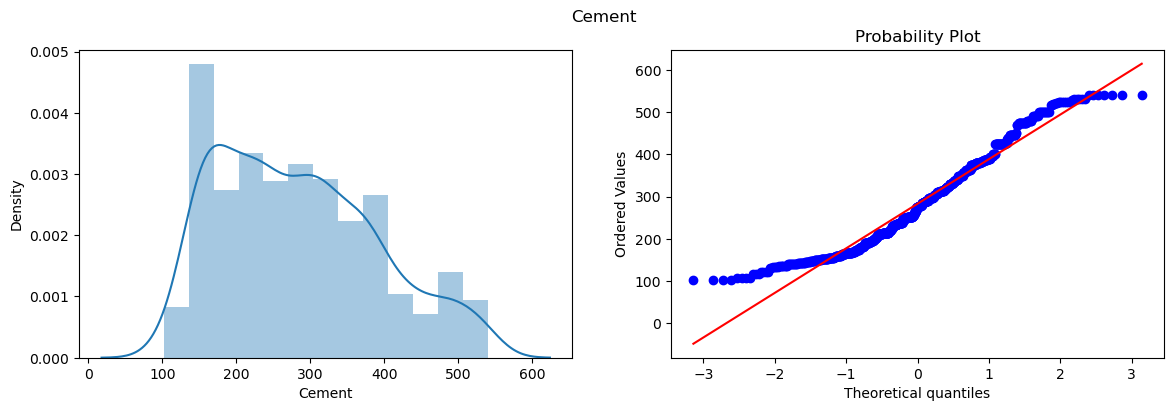

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


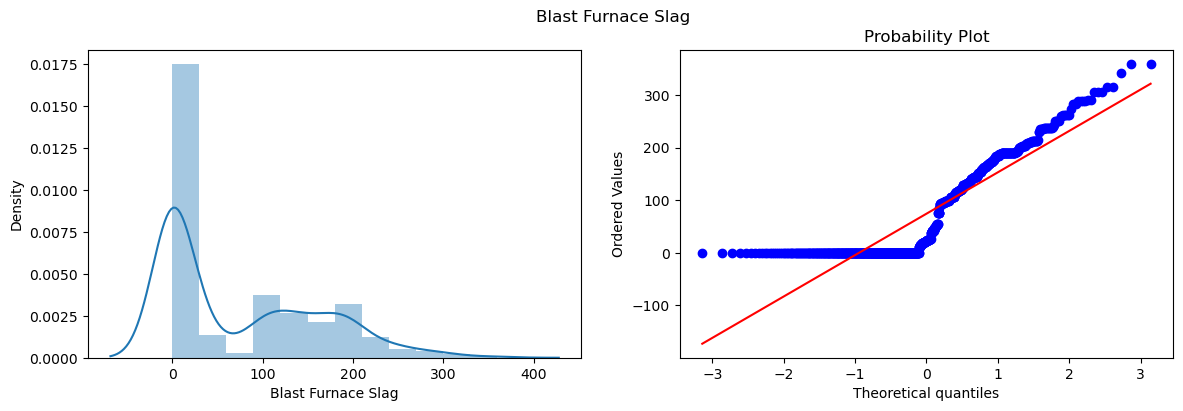

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


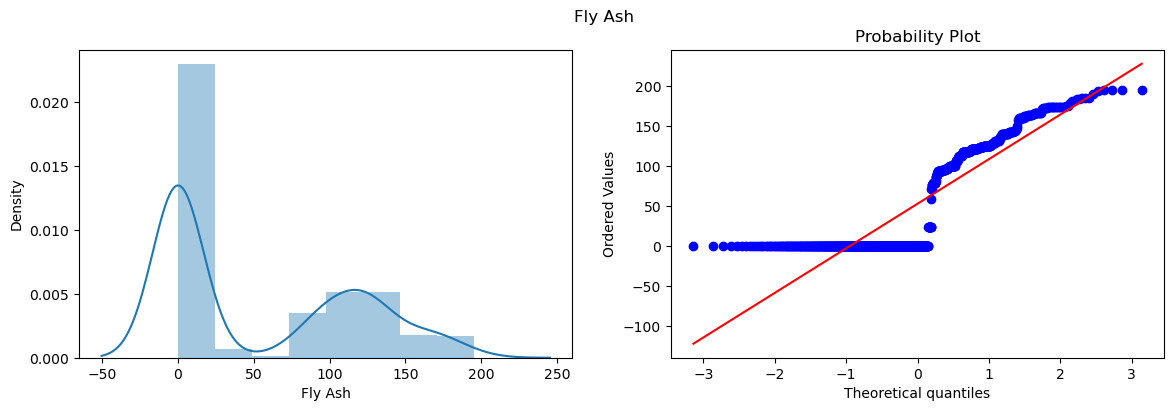

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


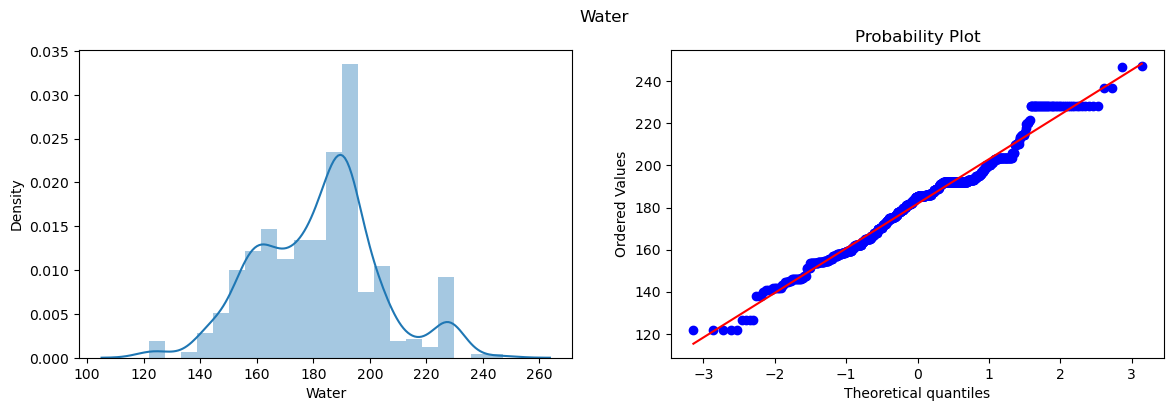

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


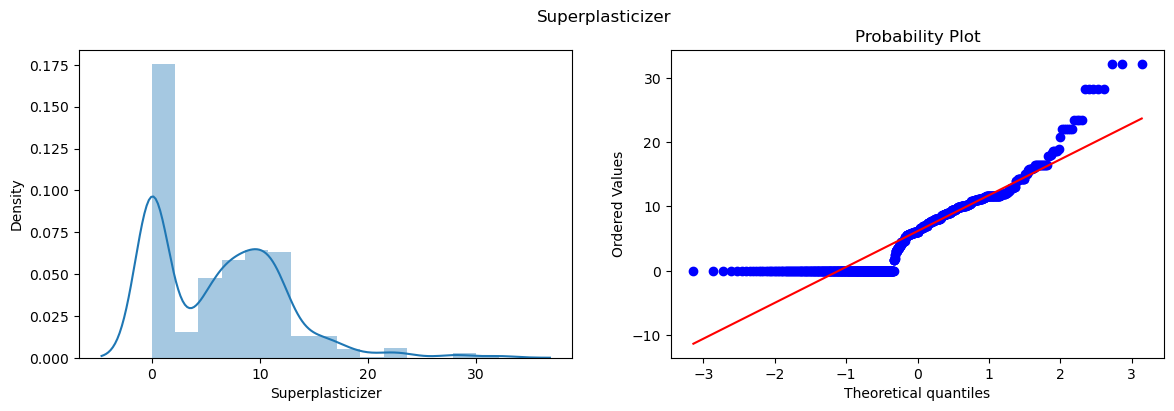

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


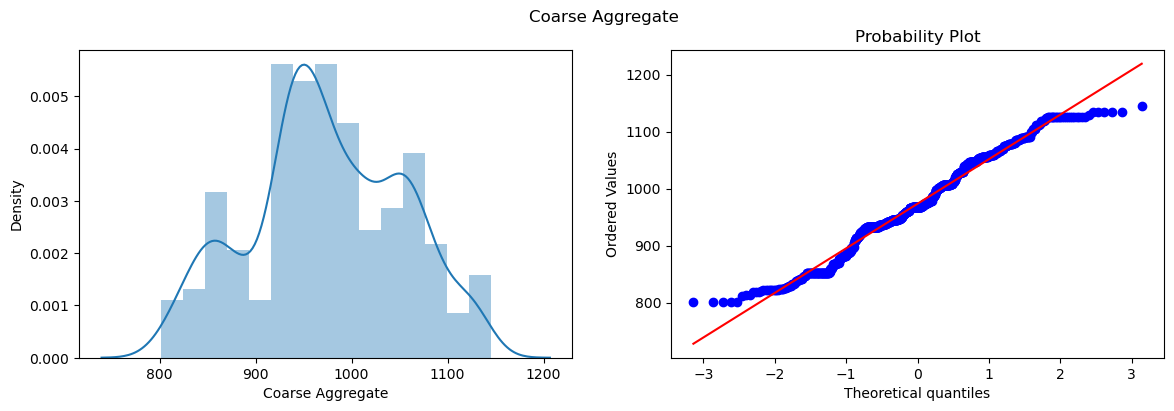

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


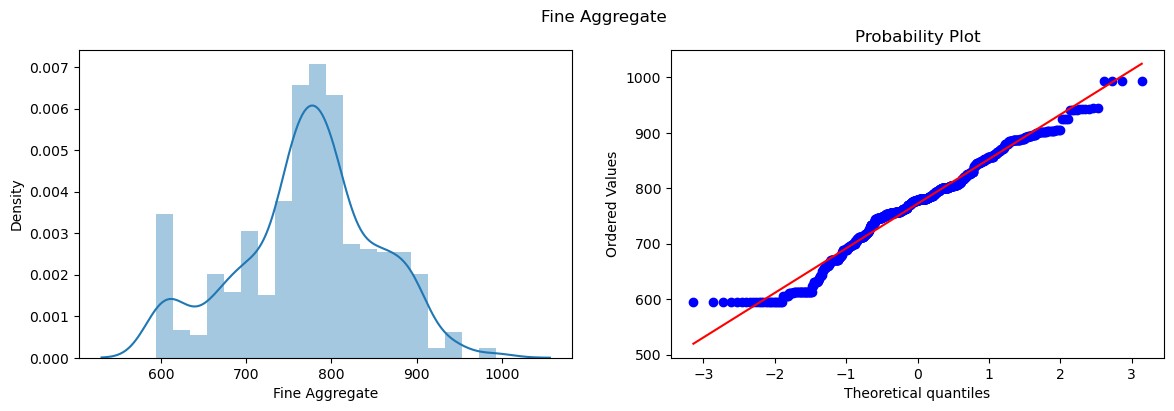

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


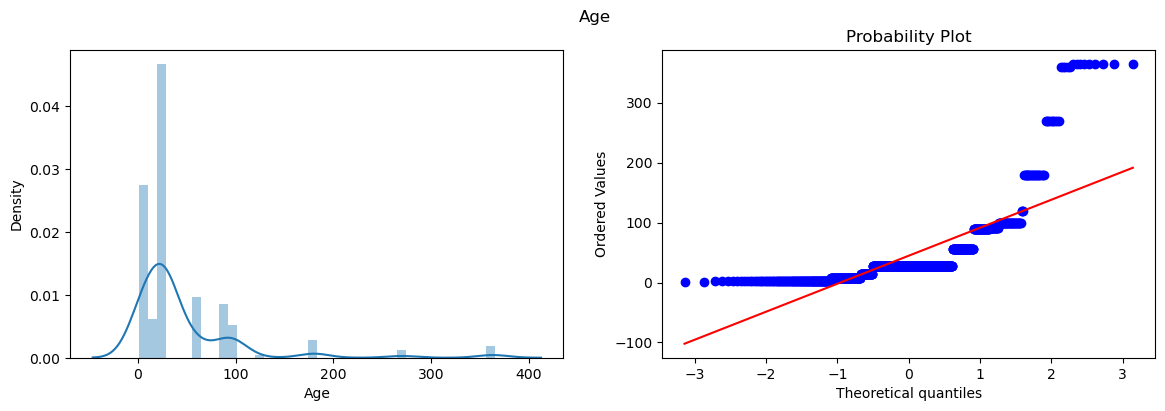

In [40]:
#plotting Dist and QQ plot of each features  

for cols in x_train.columns:
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.suptitle(cols)
    
    plt.subplot(122)
    stats.probplot(x_train[cols], dist ='norm', plot =plt)
    plt.show()
    
    

# Power Transformation

In [32]:
# Applying Box-Cox Plot Transform

pt = PowerTransformer(method='box-cox')

x_train_trans = pt.fit_transform(x_train + 0.000001)
x_test_trans  = pt.transform(x_test + 0.000001)

pd.DataFrame({'cols':x_train.columns,'Box_cox_lambdas':pt.lambdas_})

,cols,Box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [39]:
#Applying Regression after applying box-cox

lr= LinearRegression()
lr.fit(x_train_trans,y_train)

y_pred_boxcox = lr.predict(x_test_trans)
print('r2_score after application of box_cox transformation' ,r2_score(y_test,y_pred_boxcox))

x_transformed = pt.fit_transform(x+0.0000001)

print('cross_val_score after application of box_cox transformation ',np.mean(cross_val_score(lr,x_transformed,y,scoring='r2')))

r2_score after application of box_cox transformation 0.8047825006181187
cross_val_score after application of box_cox transformation  0.6658537942219862


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


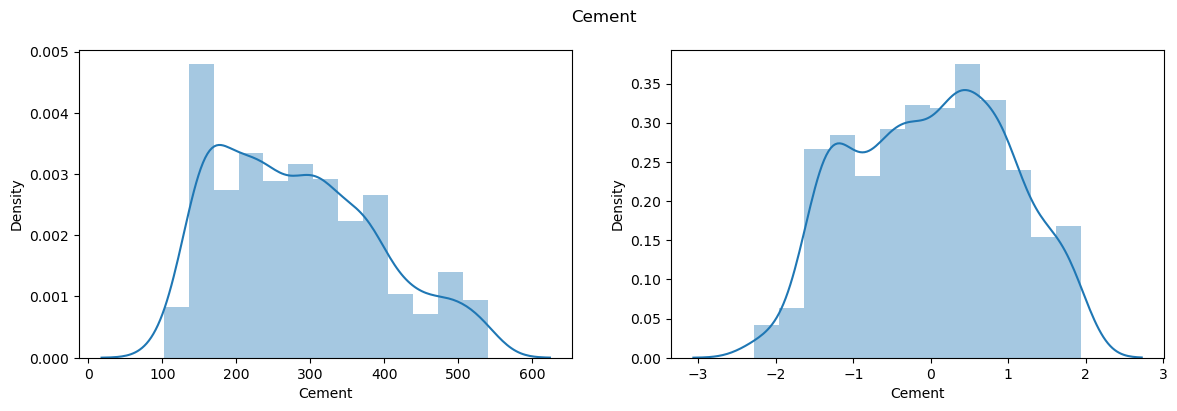

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


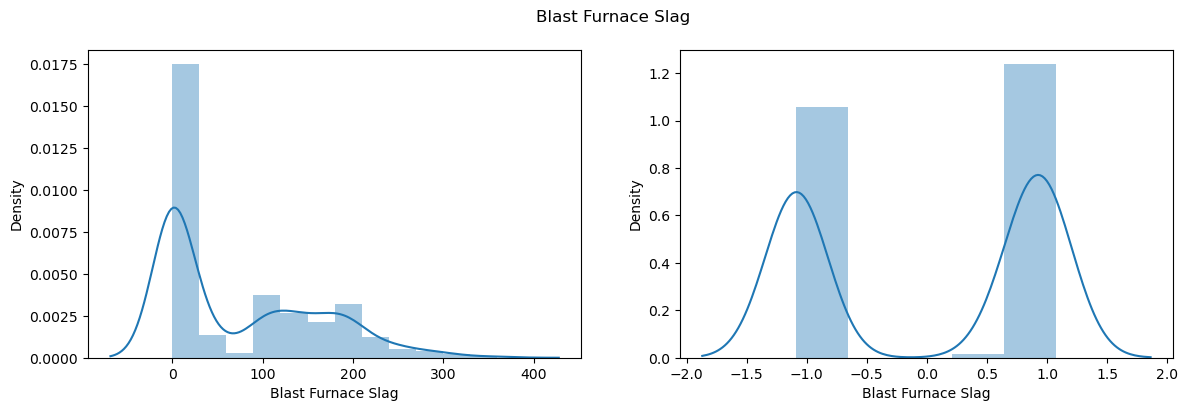

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


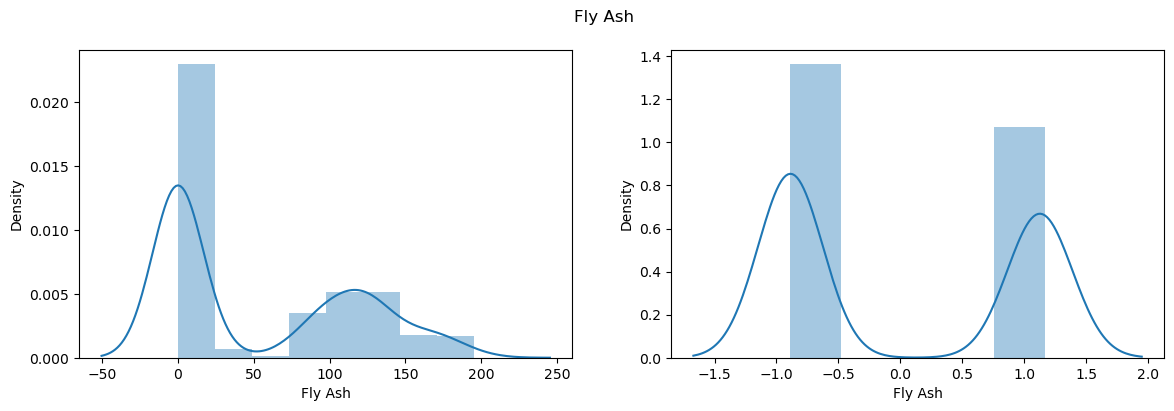

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


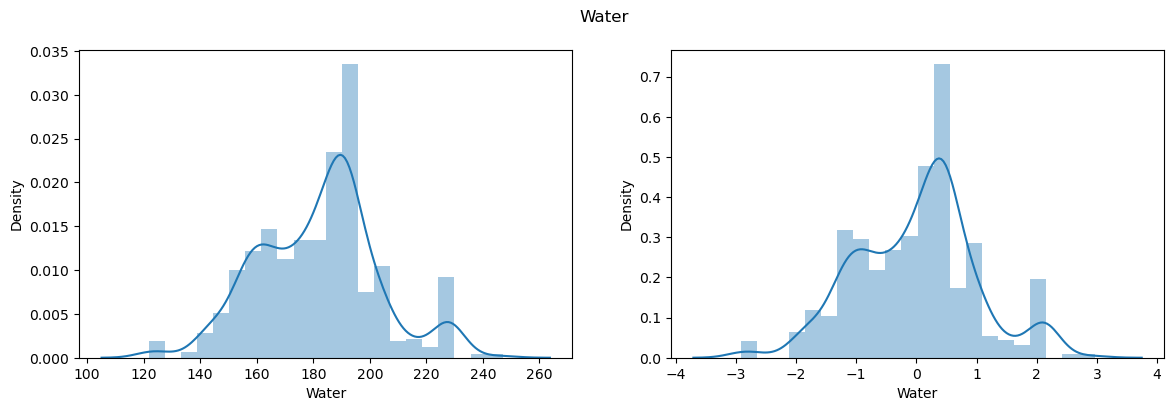

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


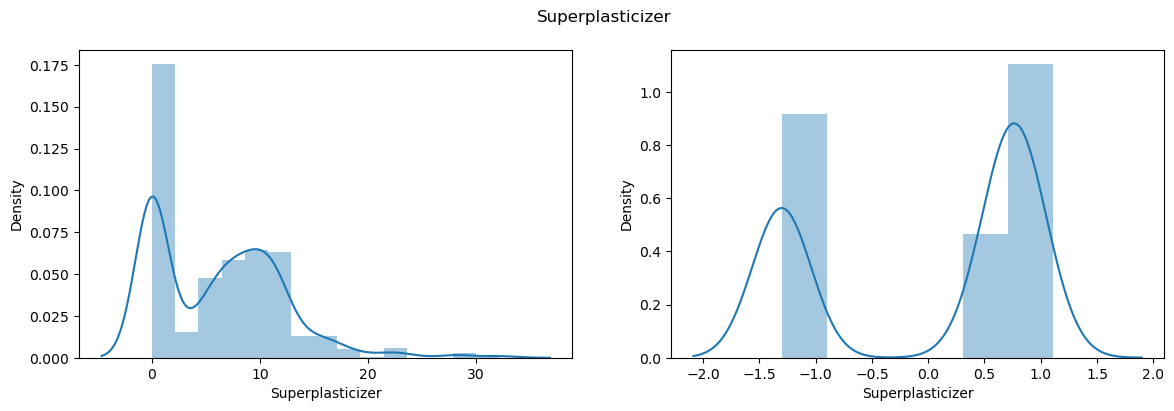

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


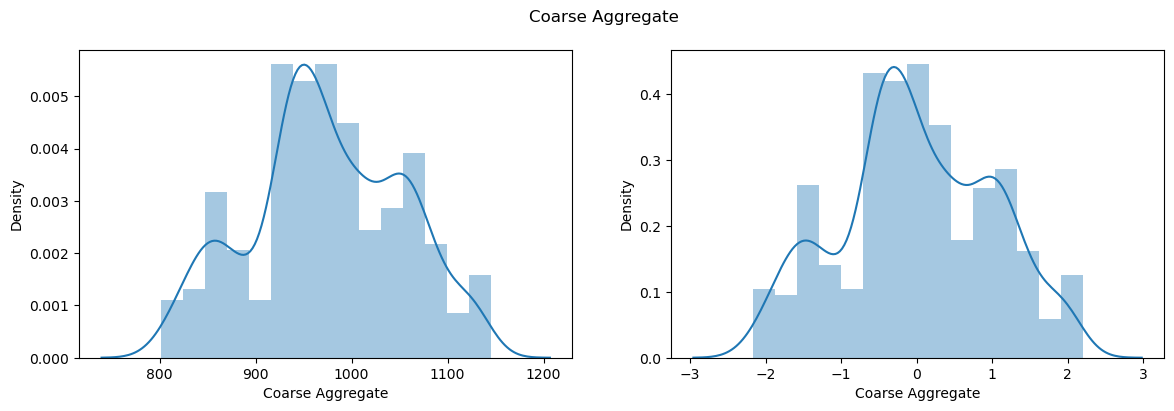

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


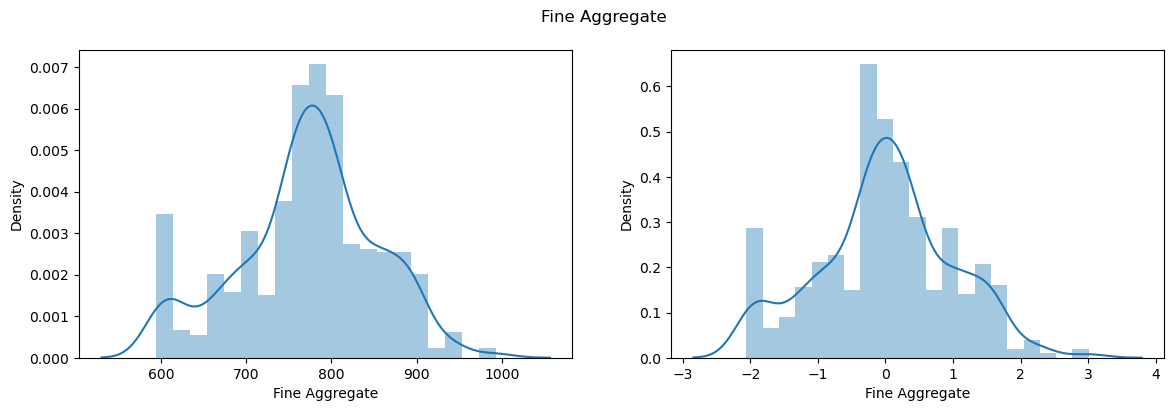

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


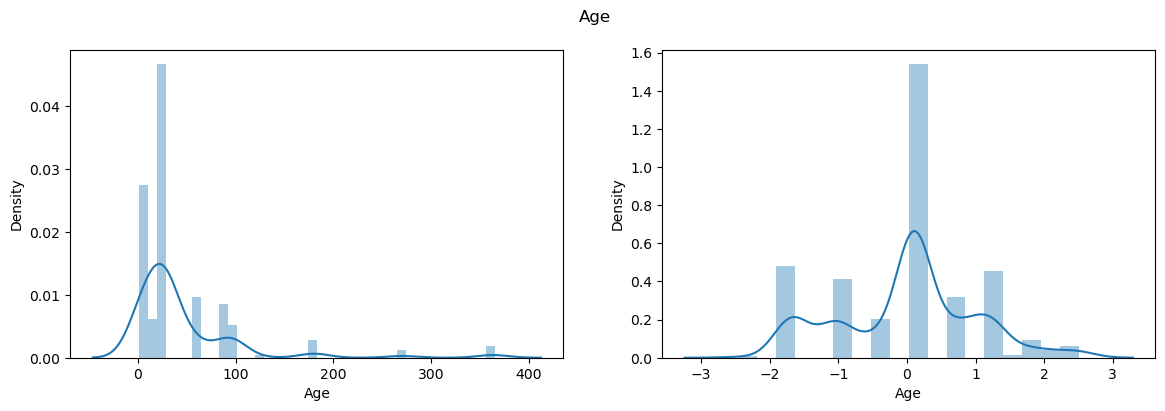

In [48]:
# Effect of box-cox transformation (Distplot) 

x_train_trans_Df = pd.DataFrame(data=x_train_trans,columns=x_train.columns)
x_test_trans_Df  = pd.DataFrame(data=x_test_trans,columns=x_test.columns)

for cols in x_train_trans_Df.columns:
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.suptitle(cols)
    
    plt.subplot(122)
    sns.distplot(x_train_trans_Df[cols])
    plt.show()

    

In [50]:
# Applying Yeo-Johnsons

pt = PowerTransformer()

x_train_trans = pt.fit_transform(x_train)
x_test_trans  = pt.transform(x_test)

pd.DataFrame({'cols':x_train.columns,'Box_cox_lambdas':pt.lambdas_})


,cols,Box_cox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [51]:
#Applying Regression after applying yeo-johnson

lr= LinearRegression()
lr.fit(x_train_trans,y_train)

y_pred_yeojohnson = lr.predict(x_test_trans)
print('r2_score after application of box_cox transformation' ,r2_score(y_test,y_pred_yeojohnson))

x_transformed = pt.fit_transform(x)

print('cross_val_score after application of box_cox transformation ',np.mean(cross_val_score(lr,x_transformed,y,scoring='r2')))

r2_score after application of box_cox transformation 0.8161906513339305
cross_val_score after application of box_cox transformation  0.6834625134285743


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


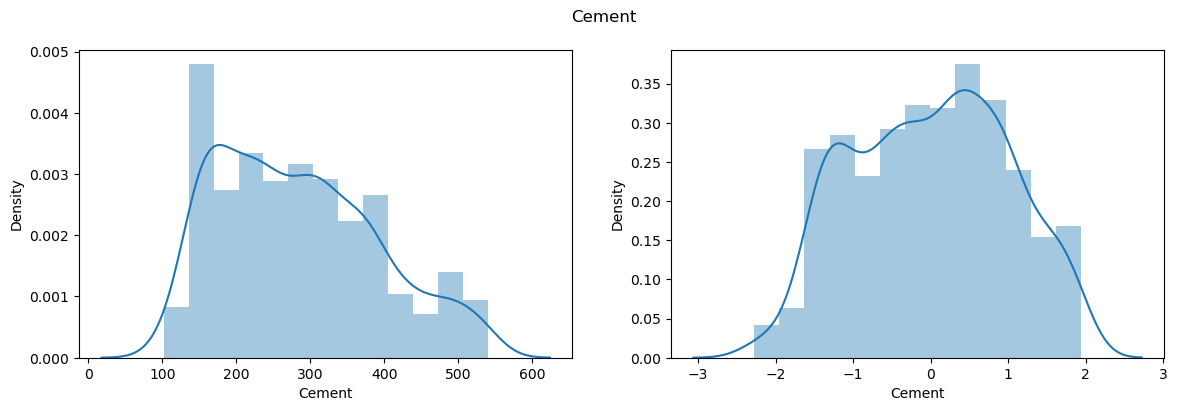

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


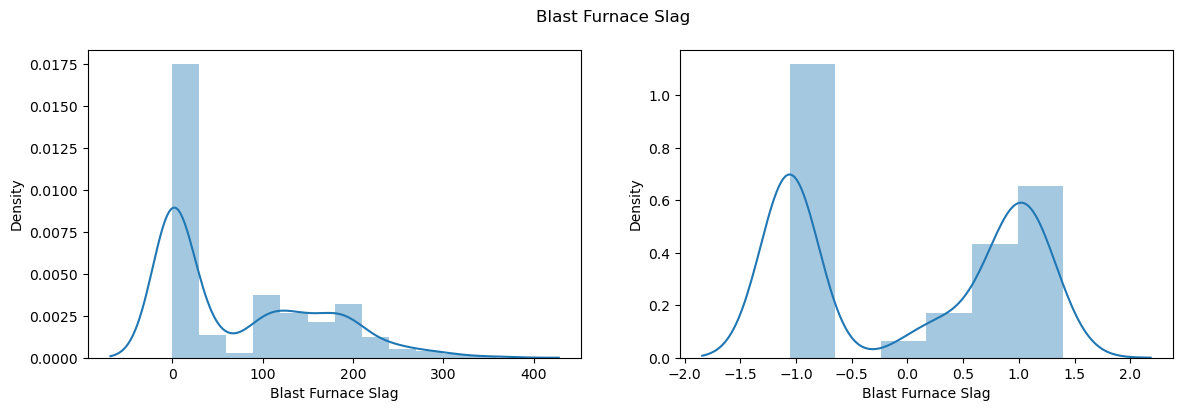

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


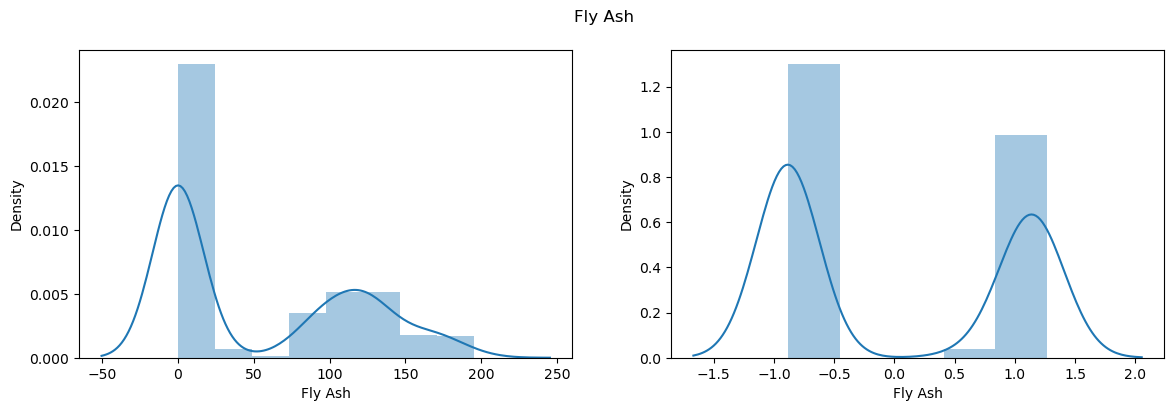

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


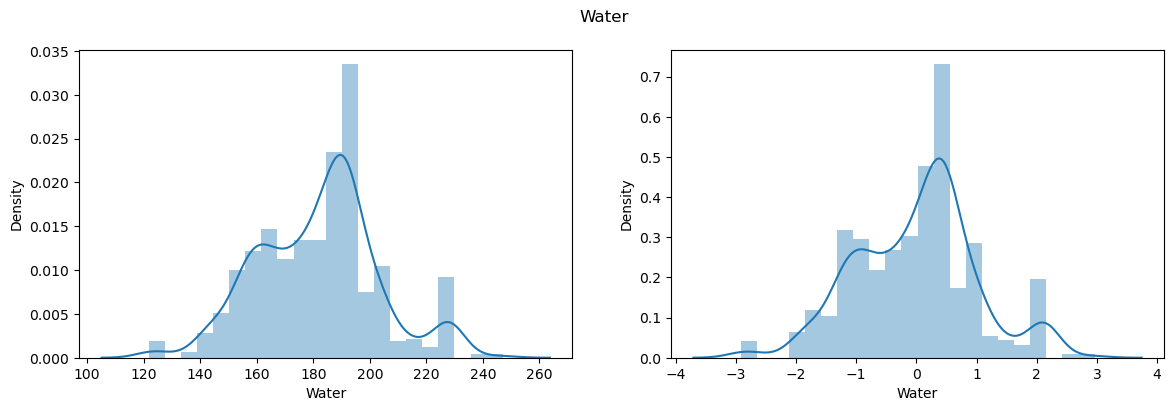

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


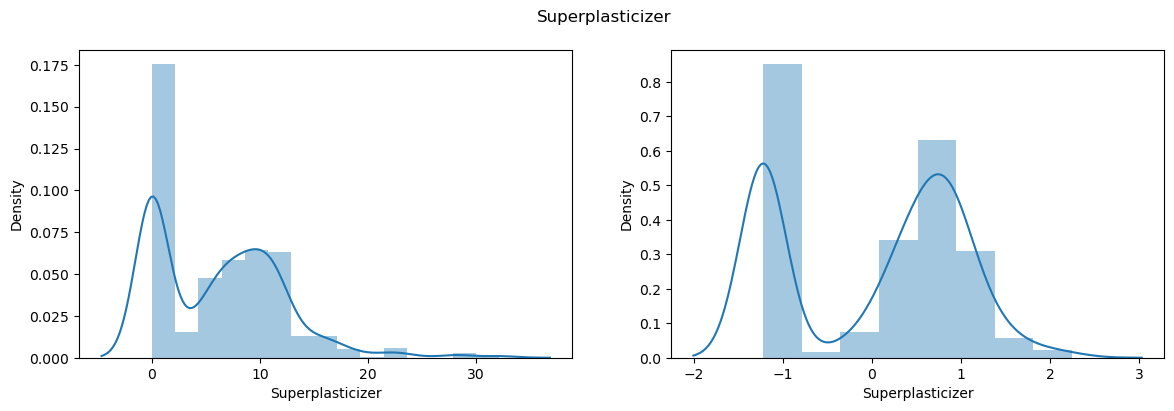

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


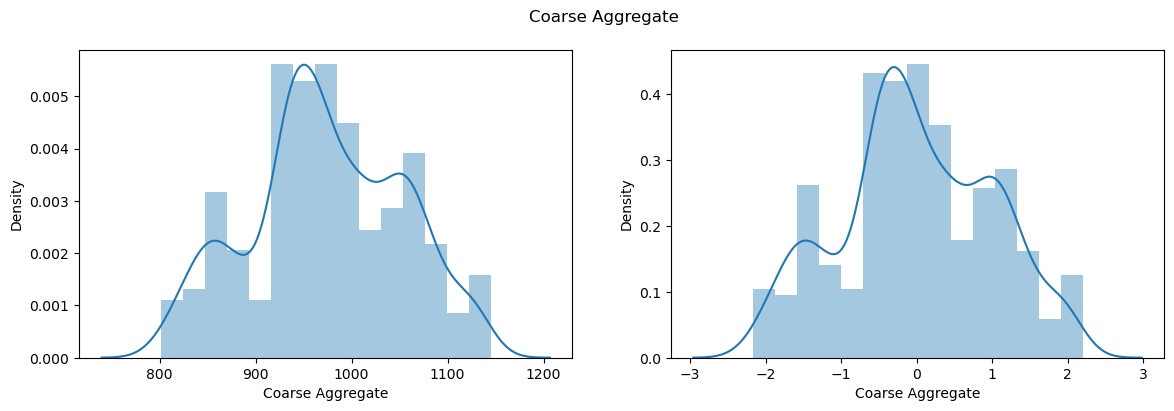

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


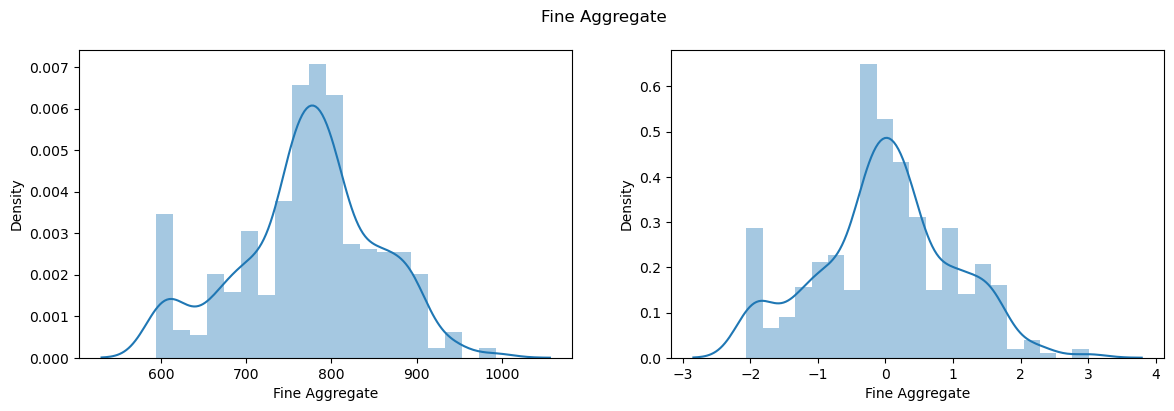

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


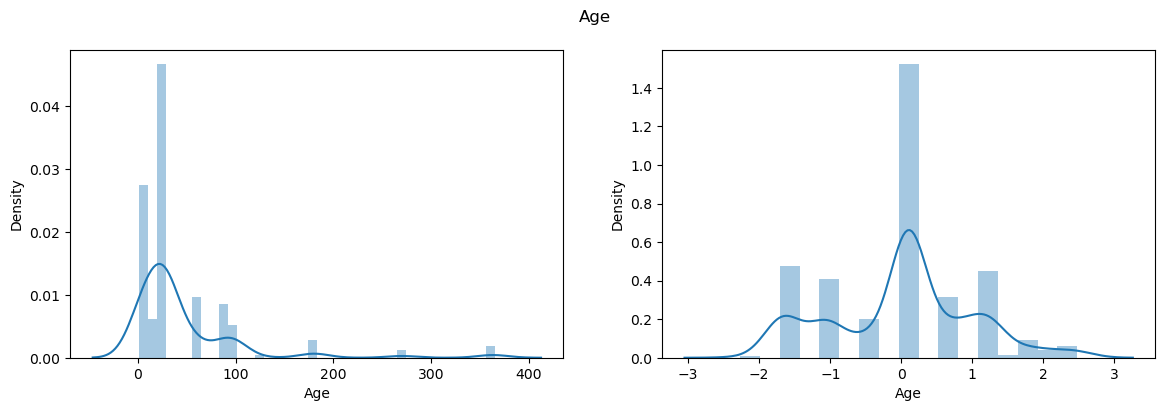

In [52]:
# Effect of yeo-johnson transformation (Distplot) 

x_train_trans_Df = pd.DataFrame(data=x_train_trans,columns=x_train.columns)
x_test_trans_Df  = pd.DataFrame(data=x_test_trans,columns=x_test.columns)

for cols in x_train_trans_Df.columns:
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.suptitle(cols)
    
    plt.subplot(122)
    sns.distplot(x_train_trans_Df[cols])
    plt.show()

# Function transformation

In [53]:
df_titanic = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df_titanic

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [58]:
#filling the null values in Age column with mean value
df_titanic.fillna(df_titanic.Age.mean(),inplace=True)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_titanic.drop(columns=['Survived']),df_titanic.Survived,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712,), (179,))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


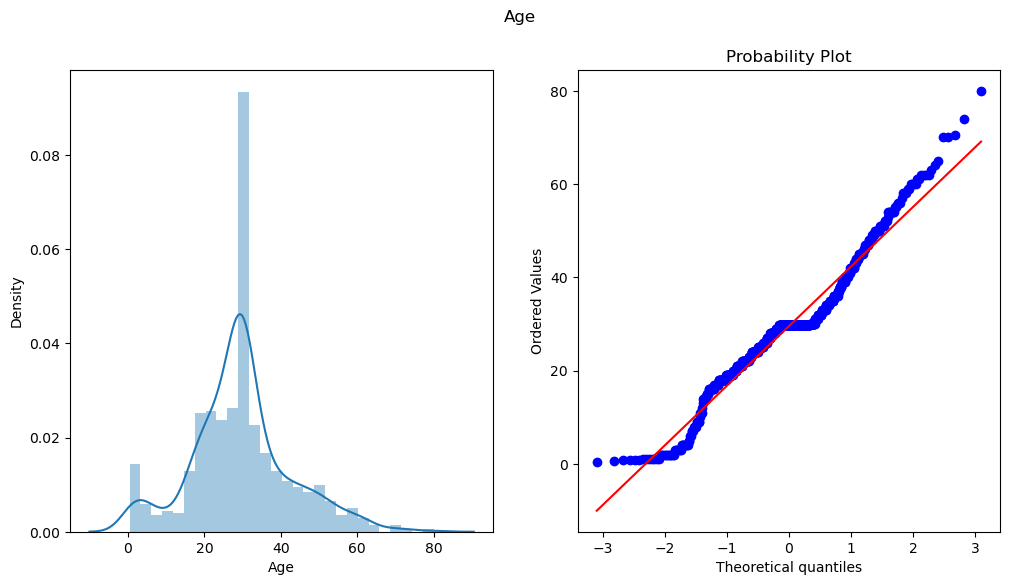

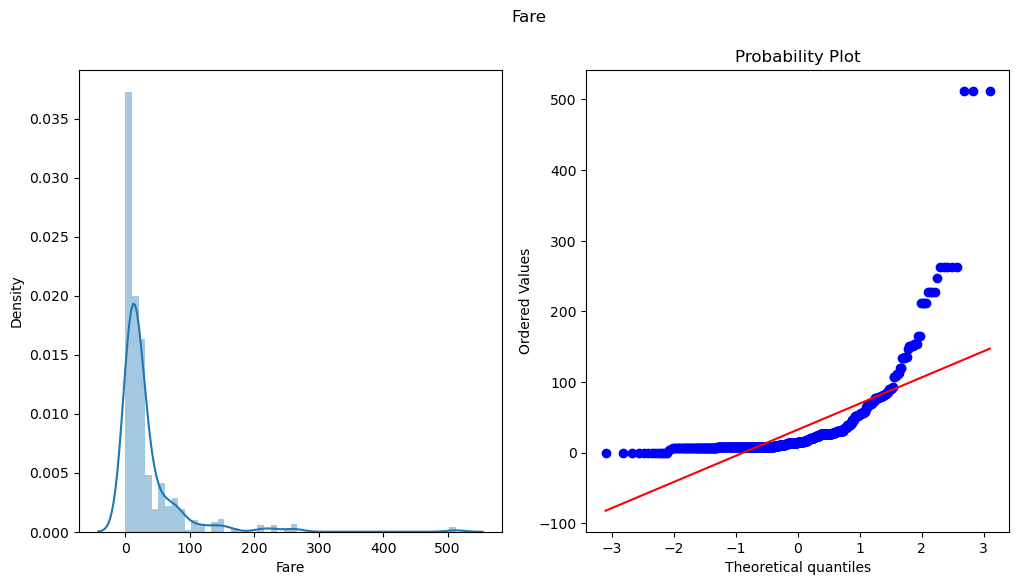

In [66]:
for cols in x_train.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.distplot(x_train[cols])
    plt.suptitle(cols)
    
    plt.subplot(122)
    stats.probplot(x_train[cols],dist='norm',plot=plt)    

In [71]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()

LR.fit(x_train,y_train)
DT.fit(x_train,y_train)

y_pred_LR = LR.predict(x_test)
y_pred_DT = DT.predict(x_test)

print('r2_score achieved by Logistic Regression is :', accuracy_score(y_test,y_pred_LR))
print('r2_score achieved by Decision Tree Regressor is :', accuracy_score(y_test,y_pred_DT))

r2_score achieved by Logistic Regression is : 0.6480446927374302
r2_score achieved by Decision Tree Regressor is : 0.659217877094972


In [88]:
#since fare is right skewed we will apply log transformation (Function transformation)

trf_fare= ColumnTransformer(transformers=[
    ('Function_transformer',FunctionTransformer(func=np.log1p),['Fare'])
    
],remainder='passthrough')

x_train_trf = trf_fare.fit_transform(x_train)
x_test_trf = trf_fare.transform(x_test)

LR = LogisticRegression()
DT = DecisionTreeClassifier()

LR.fit(x_train_trf,y_train)
DT.fit(x_train_trf,y_train)

y_pred_LR = LR.predict(x_test_trf)
y_pred_DT = DT.predict(x_test_trf)

print('r2_score achieved by Logistic Regression is :', accuracy_score(y_test,y_pred_LR))
print('r2_score achieved by Decision Tree Regressor is :', accuracy_score(y_test,y_pred_DT))


r2_score achieved by Logistic Regression is : 0.6703910614525139
r2_score achieved by Decision Tree Regressor is : 0.6536312849162011


In [91]:
# Creating function for Function Transformer
def apply_transform (transform):
    x= df_titanic.iloc[:,1:3]
    y= df_titanic.iloc[:,0]
    
    trf = ColumnTransformer(transformers=[('Function_transformer',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    x_trans  = trf.fit_transform(x)
    
    print('Accuracy',np.mean(cross_val_score(LogisticRegression(),x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    stats.probplot(x['Fare'],plot=plt,dist='norm')
    plt.title('QQ Plot of Fare before Transformation')
    
    plt.subplot(122)
    stats.probplot(x_trans[:,0],plot=plt,dist='norm')
    plt.title('QQ Plot of Fare After Transformation')
    plt.show()
    
    
    


Accuracy 0.6589013732833957


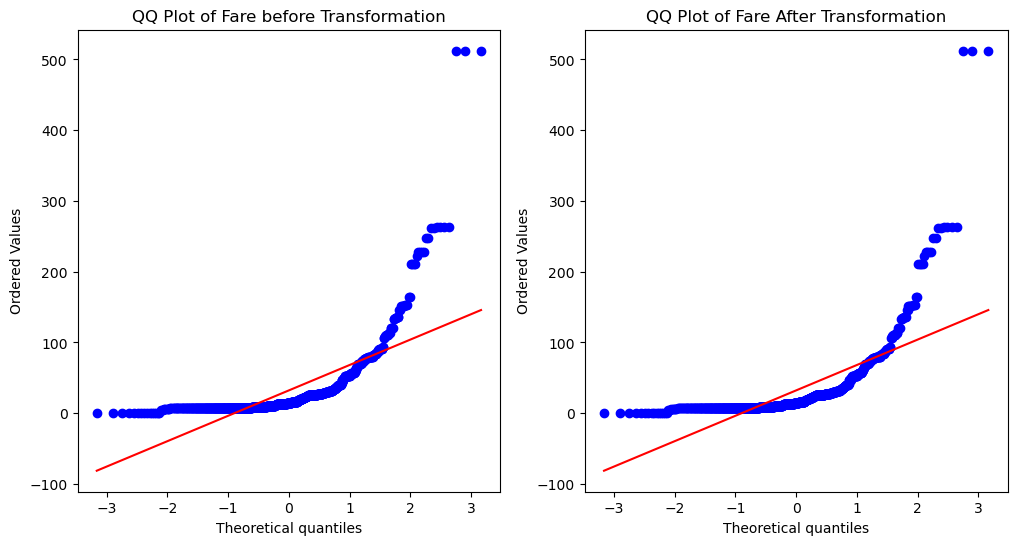

In [92]:
#No function application
apply_transform(lambda x : x)

Accuracy 0.6712609238451936


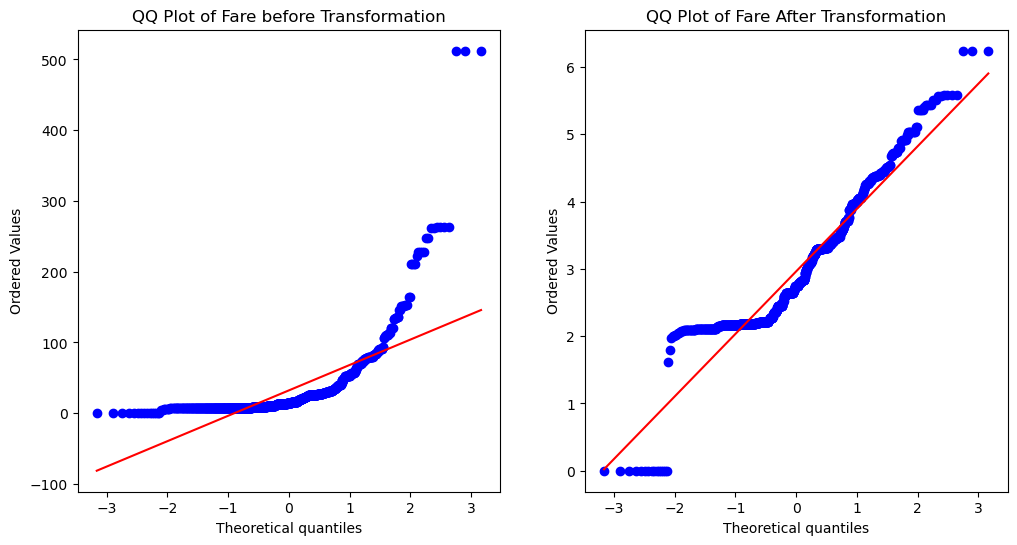

In [100]:
#Log function
apply_transform(lambda x : np.log1p(x))

Accuracy 0.6442446941323345


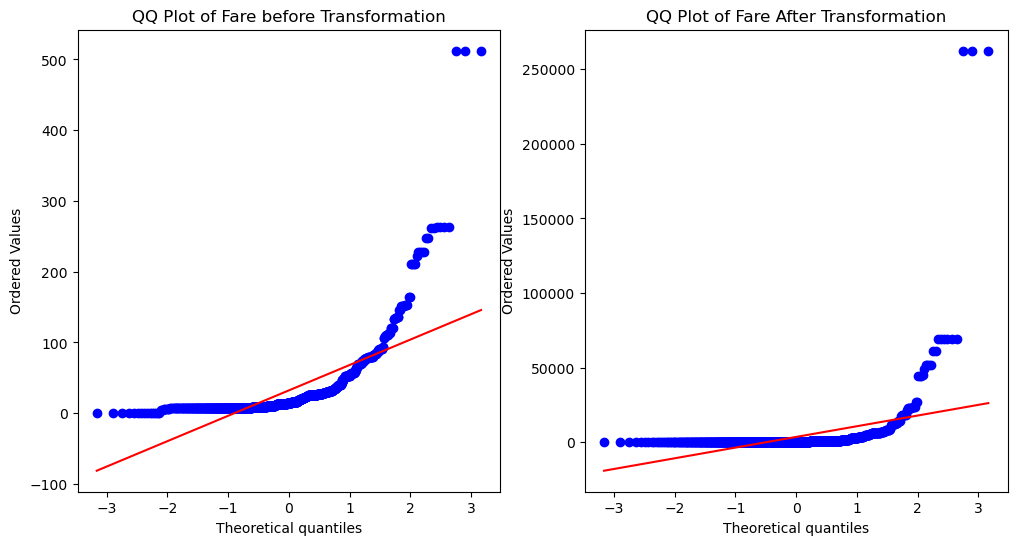

In [101]:
#Square function
apply_transform(lambda x : x**2)

Accuracy 0.61729088639201


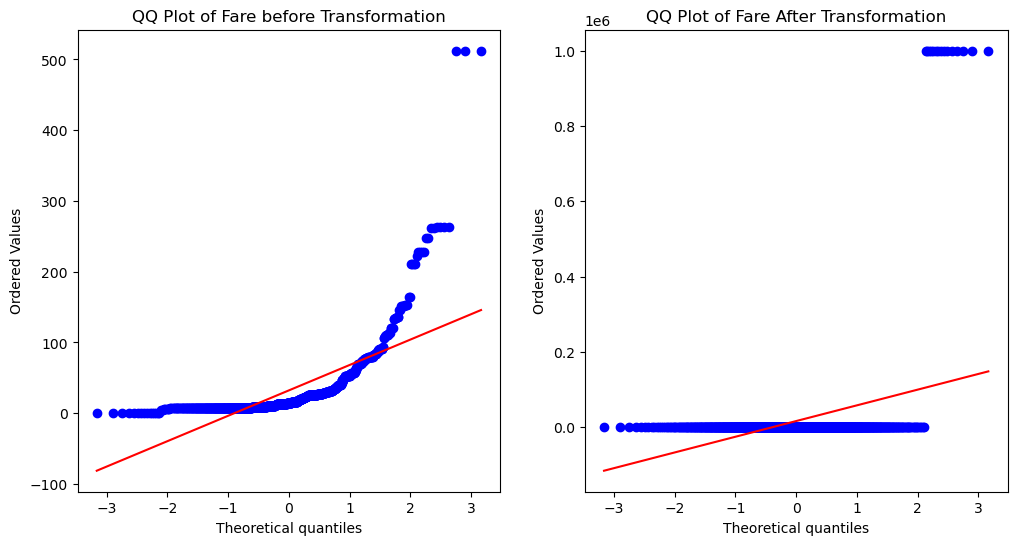

In [104]:
#reciprocal function
apply_transform(lambda x : 1/(x+0.000001))

# Conculsion

- Both Function and Power transformer are used to to make the distribution of particular function to normally distributed form.
- In Function trasformer, Log is used in right skewed data for normalization and square is used for left skewed data for normilisation.
- In Power function the default method Yeo- Johnson provide the best results as depicted in above analysis.